# Global Power Plant Database Project


In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import train_test_split

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


import warnings
warnings.filterwarnings("ignore")

In [2]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import ExtraTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor

from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.model_selection import train_test_split
from scipy.stats import zscore
from sklearn.metrics import r2_score

In [3]:
# Import DataSet: 

df = pd.read_csv(r"E:\Anuradha\datatrained\global_power_plant_database.csv")
df.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN


In [4]:
df.shape

(907, 27)

In [5]:
nRow, nCol = df.shape

In [6]:
print(f'There are {nRow} rows and {nCol} columns')

There are 907 rows and 27 columns


In [7]:
df.info

<bound method DataFrame.info of     country country_long                          name   gppd_idnr  \
0       IND        India              ACME Solar Tower  WRI1020239   
1       IND        India           ADITYA CEMENT WORKS  WRI1019881   
2       IND        India      AES Saurashtra Windfarms  WRI1026669   
3       IND        India                   AGARTALA GT  IND0000001   
4       IND        India                  AKALTARA TPP  IND0000002   
..      ...          ...                           ...         ...   
902     IND        India                  YERMARUS TPP  IND0000513   
903     IND        India  Yelesandra Solar Power Plant  WRI1026222   
904     IND        India  Yelisirur wind power project  WRI1026776   
905     IND        India                   ZAWAR MINES  WRI1019901   
906     IND        India       iEnergy Theni Wind Farm  WRI1026761   

     capacity_mw  latitude  longitude primary_fuel other_fuel1 other_fuel2  \
0            2.5   28.1839    73.2407        Sola

Distribution graphs (histogram/bar graph) of sampled columns:

<AxesSubplot:>

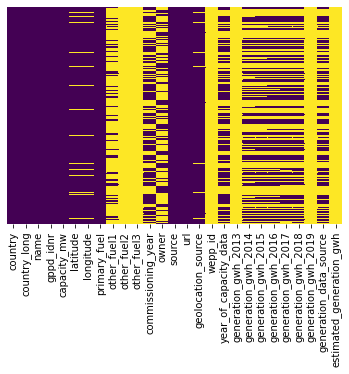

In [8]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap="viridis")

In [9]:
#Observe the given DataSet:

df.describe()

,capacity_mw,latitude,longitude,other_fuel3,commissioning_year,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,estimated_generation_gwh
count,907.000000,861.000000,861.000000,0.0,527.000000,0.0,519.0,0.0,398.000000,422.000000,434.000000,440.000000,448.000000,0.0,0.0
mean,326.223755,21.197918,77.464907,NaN,1997.091082,NaN,2019.0,NaN,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,NaN,NaN
std,590.085456,6.239612,4.939316,NaN,17.082868,NaN,0.0,NaN,4026.440035,4194.596959,4162.884308,4196.991169,4314.880456,NaN,NaN
min,0.000000,8.168900,68.644700,NaN,1927.000000,NaN,2019.0,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,16.725000,16.773900,74.256200,NaN,1988.000000,NaN,2019.0,NaN,223.557672,176.381063,188.285252,177.874930,193.378250,NaN,NaN
50%,59.200000,21.780000,76.719500,NaN,2001.000000,NaN,2019.0,NaN,801.123775,711.181225,737.205450,817.977250,751.644375,NaN,NaN
75%,385.250000,25.512400,79.440800,NaN,2012.000000,NaN,2019.0,NaN,3035.306250,3084.121250,3282.861313,3275.690475,3143.535900,NaN,NaN
max,4760.000000,34.649000,95.408000,NaN,2018.000000,NaN,2019.0,NaN,28127.000000,30539.000000,30015.000000,35116.000000,35136.000000,NaN,NaN


In [10]:
df.isnull().sum()/df.shape[0]*100

country                       0.000000
country_long                  0.000000
name                          0.000000
gppd_idnr                     0.000000
capacity_mw                   0.000000
latitude                      5.071665
longitude                     5.071665
primary_fuel                  0.000000
other_fuel1                  78.169791
other_fuel2                  99.889746
other_fuel3                 100.000000
commissioning_year           41.896362
owner                        62.293275
source                        0.000000
url                           0.000000
geolocation_source            2.094818
wepp_id                     100.000000
year_of_capacity_data        42.778390
generation_gwh_2013         100.000000
generation_gwh_2014          56.119074
generation_gwh_2015          53.472988
generation_gwh_2016          52.149945
generation_gwh_2017          51.488423
generation_gwh_2018          50.606395
generation_gwh_2019         100.000000
generation_data_source   

In [11]:
# Filling null values using their median values
df['longitude'] = df['longitude'].fillna(df['longitude'].median())
df["commissioning_year"] = df["commissioning_year"].fillna(df["commissioning_year"].median())
df["generation_gwh_2014"] = df["generation_gwh_2014"].fillna(df["generation_gwh_2014"].median())
df["generation_gwh_2015"] = df["generation_gwh_2015"].fillna(df["generation_gwh_2015"].median())
df["generation_gwh_2016"] = df["generation_gwh_2016"].fillna(df["generation_gwh_2016"].median())
df["generation_gwh_2017"] = df["generation_gwh_2017"].fillna(df["generation_gwh_2017"].median())
df["generation_gwh_2018"] = df["generation_gwh_2018"].fillna(df["generation_gwh_2018"].median())

### Drop relevantcolumns:

In [12]:
df.drop(columns=["generation_gwh_2013" , "generation_gwh_2019"],axis=1,inplace=True)

In [13]:
df.drop(columns = ["other_fuel1", "other_fuel2", "other_fuel3", "commissioning_year", "owner", "wepp_id", "year_of_capacity_data",
                   "generation_gwh_2014", "generation_gwh_2015", "generation_gwh_2016", "generation_gwh_2017",
                   "estimated_generation_gwh", "generation_data_source"], axis=1, inplace=True)

In [14]:
df["latitude"] = df['latitude'].fillna(df['latitude'].mean())


In [15]:
df.isnull().sum()

country                 0
country_long            0
name                    0
gppd_idnr               0
capacity_mw             0
latitude                0
longitude               0
primary_fuel            0
source                  0
url                     0
geolocation_source     19
generation_gwh_2018     0
dtype: int64

#### Fill the missing values:

In [16]:
df["geolocation_source"] = df["geolocation_source"].fillna(df["geolocation_source"].mode()[0])

<AxesSubplot:>

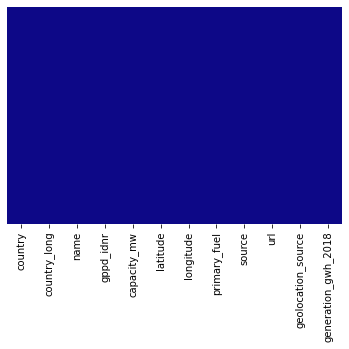

In [17]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap="plasma")

### Plot graph for further anlysis : 

<AxesSubplot:xlabel='primary_fuel', ylabel='count'>

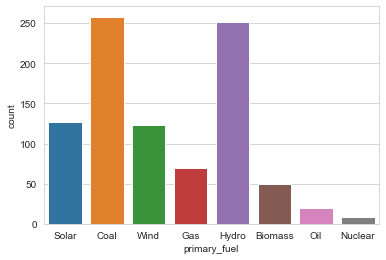

In [18]:
sns.set_style("whitegrid")
sns.countplot(x="primary_fuel", data=df)

In [19]:
df.describe()

,capacity_mw,latitude,longitude,generation_gwh_2018
count,907.000000,907.000000,907.000000,907.000000
mean,326.223755,21.197918,77.427103,1665.011030
std,590.085456,6.079148,4.815073,3168.826750
min,0.000000,8.168900,68.644700,0.000000
25%,16.725000,17.072000,74.388900,751.644375
50%,59.200000,21.281800,76.719500,751.644375
75%,385.250000,25.176450,79.206100,751.644375
max,4760.000000,34.649000,95.408000,35136.000000


### Exploratory Data Analysis

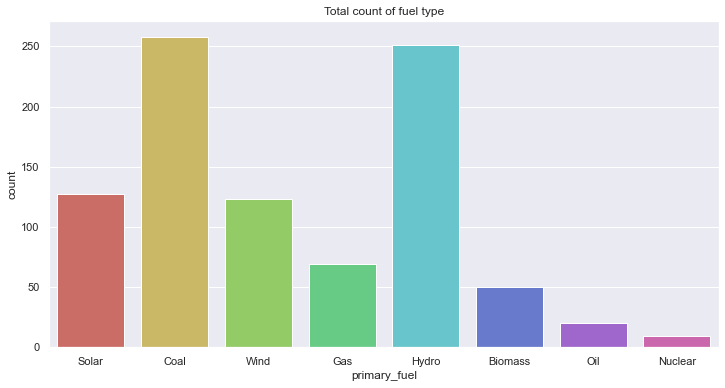

In [20]:
# Relation between different fuel type :

plt.figure(figsize=(12, 6))
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="primary_fuel", data=df, palette="hls").set(title='Total count of fuel type')

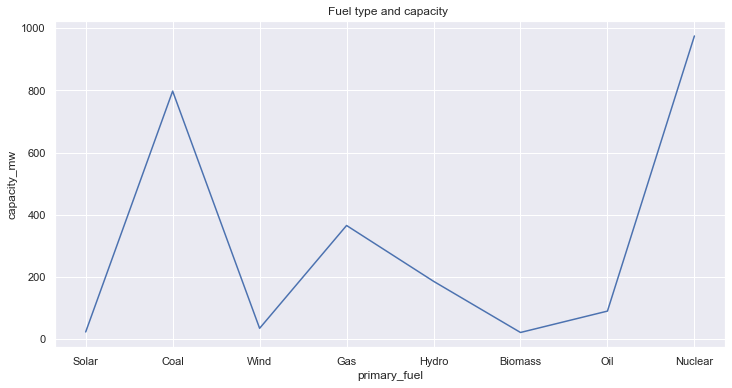

In [21]:
plt.figure(figsize=(12, 6))
sns.set_theme(style="darkgrid")
sns.lineplot(data=df, x="primary_fuel", y="capacity_mw", ci=None).set(title='Fuel type and capacity ')
plt.show()

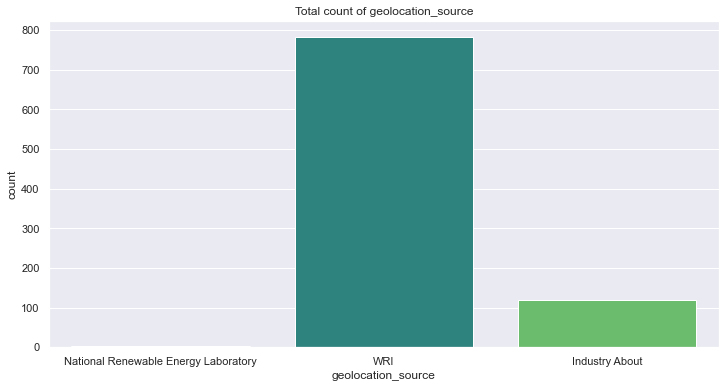

In [22]:
# 3 major players in this sector and "WRI" (World Resources Institue) 

plt.figure(figsize=(12, 6))
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="geolocation_source", data=df, palette="viridis").set(title='Total count of geolocation_source')

<AxesSubplot:xlabel='capacity_mw', ylabel='primary_fuel'>

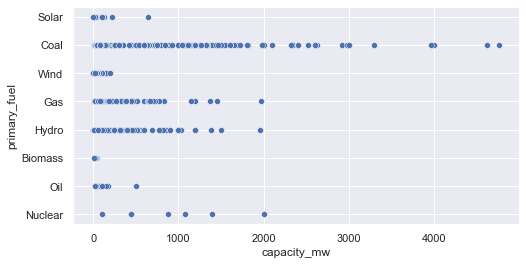

In [23]:
plt.figure(figsize=(8,4))
sns.scatterplot(x='capacity_mw',y='primary_fuel',data=df)

### Preprocessing


In [24]:
df.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'source', 'url',
       'geolocation_source', 'generation_gwh_2018'],
      dtype='object')

In [25]:
from sklearn.preprocessing import LabelEncoder

lab_enc = LabelEncoder()

In [26]:
df_new1 = lab_enc.fit_transform(df["country"])
df_new2 = lab_enc.fit_transform(df["country_long"])
df_new3 = lab_enc.fit_transform(df["name"])
df_new4 = lab_enc.fit_transform(df["gppd_idnr"])
df_new5 = lab_enc.fit_transform(df["primary_fuel"])
df_new6 = lab_enc.fit_transform(df["source"])
df_new7 = lab_enc.fit_transform(df["url"])
df_new8 = lab_enc.fit_transform(df["geolocation_source"])

In [27]:
df["country"] = df_new1
df["country_long"] = df_new2
df["name"] = df_new3
df["gppd_idnr"] = df_new4
df["primary_fuel"] = df_new5
df["source"] = df_new6
df["url"] = df_new7
df["geolocation_source"] = df_new8

In [28]:
df.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,source,url,geolocation_source,generation_gwh_2018
0,0,0,0,657,2.5,28.1839,73.2407,6,109,128,1,751.644375
1,0,0,1,519,98.0,24.7663,74.6090,1,174,173,2,751.644375
2,0,0,2,853,39.2,21.9038,69.3732,7,21,205,2,751.644375
3,0,0,3,0,135.0,23.8712,91.3602,2,22,58,2,626.239128
4,0,0,4,1,1800.0,21.9603,82.4091,1,22,58,2,7279.000000


In [29]:
df.describe()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,source,url,geolocation_source,generation_gwh_2018
count,907.0,907.0,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000
mean,0.0,0.0,453.000000,453.000000,326.223755,21.197918,77.427103,3.206174,43.847850,94.469680,1.733186,1665.011030
std,0.0,0.0,261.972645,261.972645,590.085456,6.079148,4.815073,2.280652,44.642818,70.381222,0.677151,3168.826750
min,0.0,0.0,0.000000,0.000000,0.000000,8.168900,68.644700,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.0,226.500000,226.500000,16.725000,17.072000,74.388900,1.000000,22.000000,58.000000,2.000000,751.644375
50%,0.0,0.0,453.000000,453.000000,59.200000,21.281800,76.719500,3.000000,22.000000,58.000000,2.000000,751.644375
75%,0.0,0.0,679.500000,679.500000,385.250000,25.176450,79.206100,6.000000,29.500000,115.500000,2.000000,751.644375
max,0.0,0.0,906.000000,906.000000,4760.000000,34.649000,95.408000,7.000000,190.000000,303.000000,2.000000,35136.000000


###  Distribution of columns:

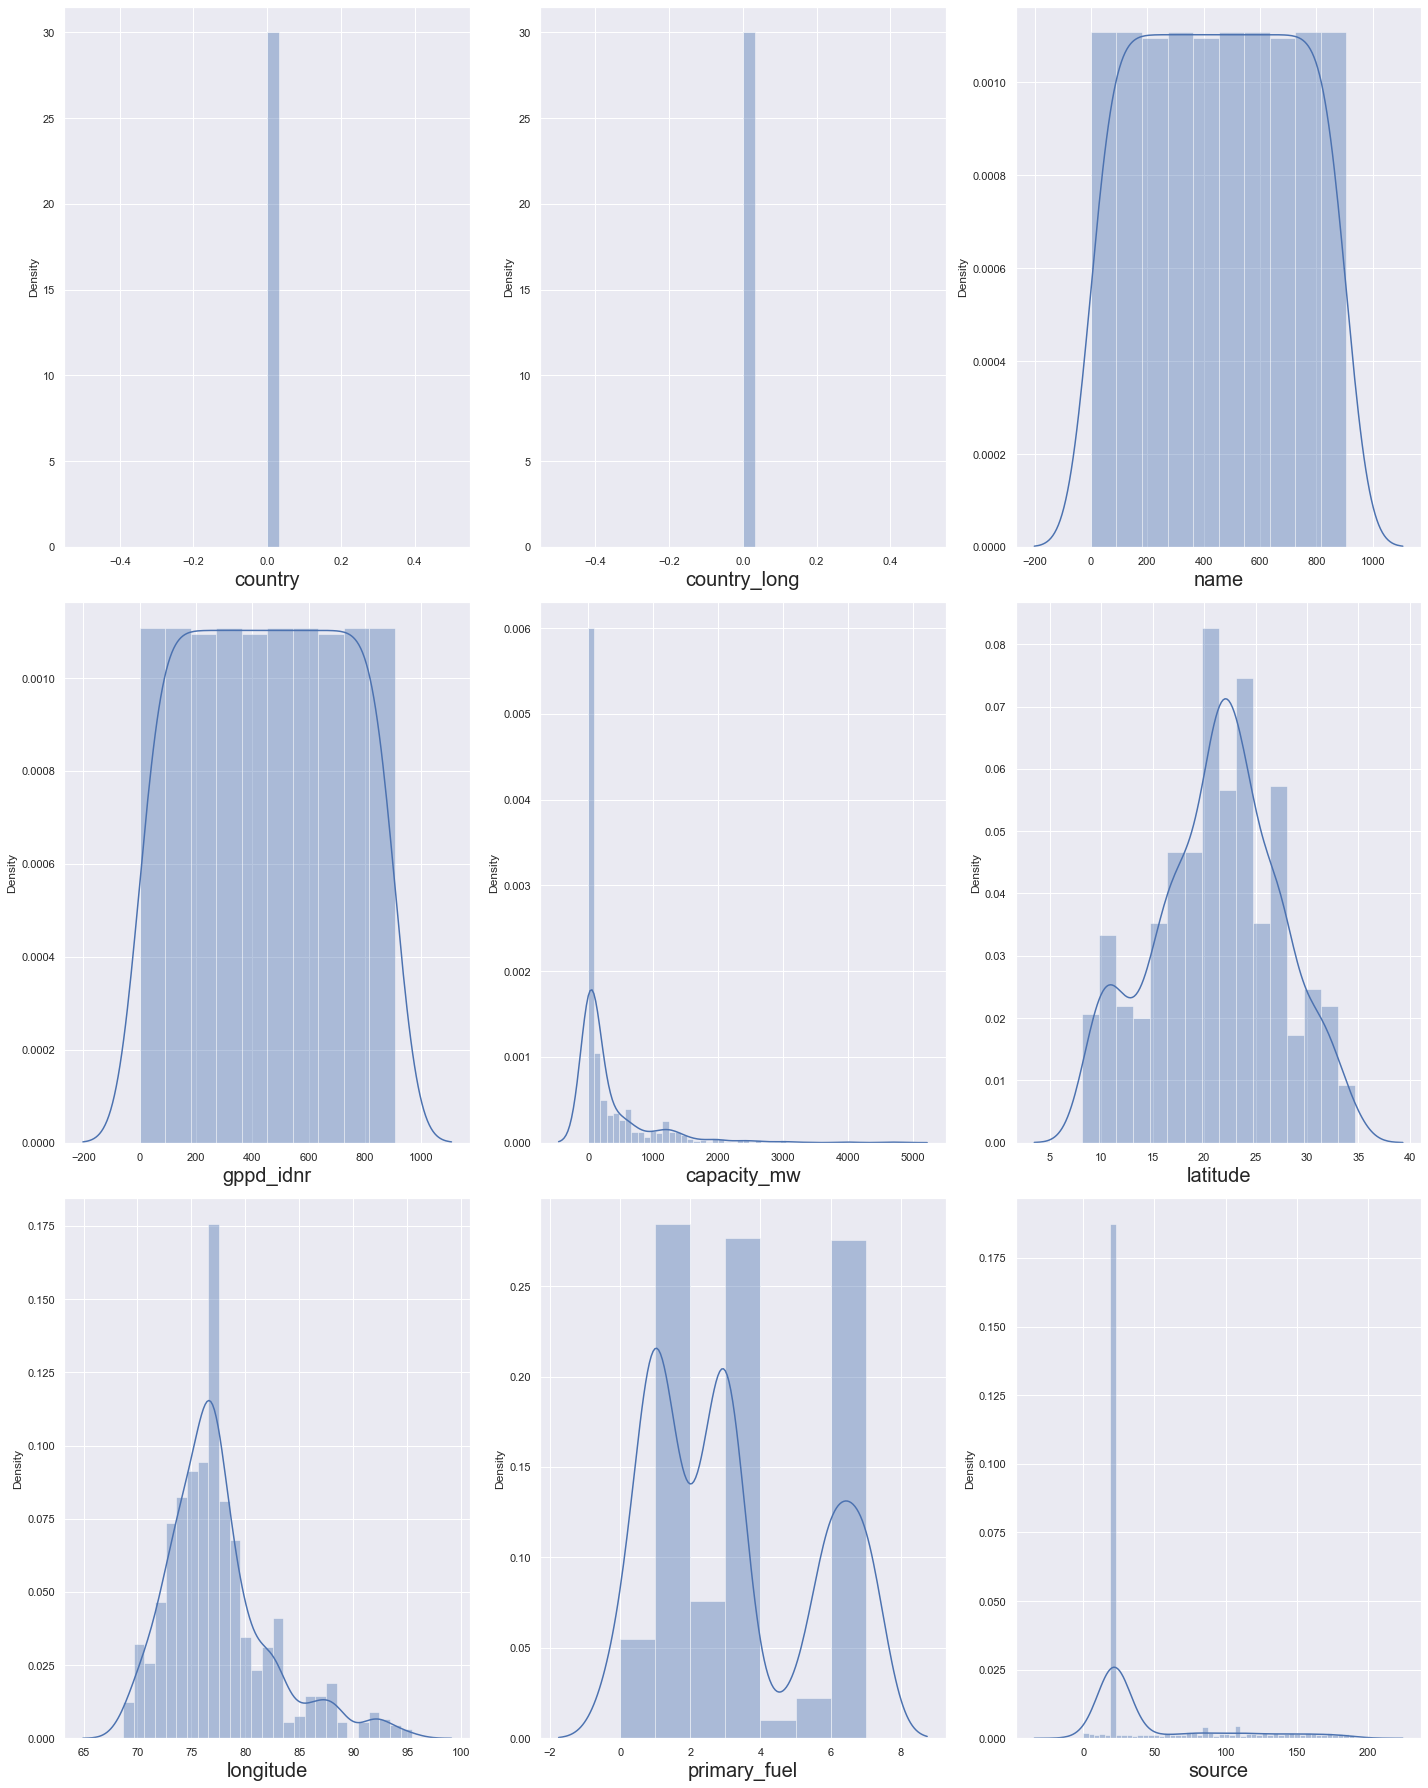

In [30]:
plt.figure(figsize=(20,25), facecolor="white")
plotnumber = 1

for column in df:
    if plotnumber <=9:
        ax = plt.subplot(3,3, plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column, fontsize=20)
    plotnumber+=1
plt.tight_layout()

2    784
0    119
1      4
Name: geolocation_source, dtype: int64


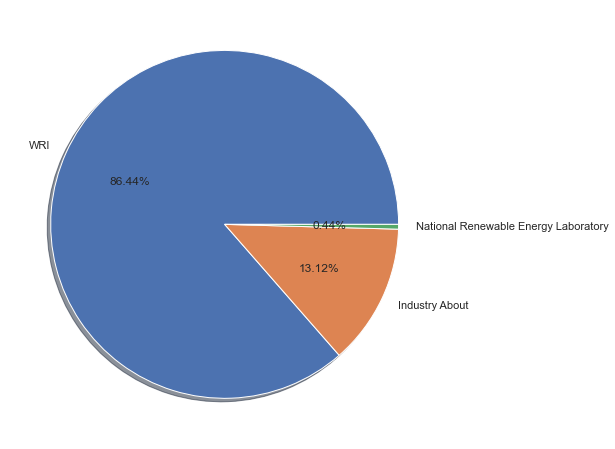

In [31]:
# Visualizing the counts of geolocation_source:


print(df["geolocation_source"].value_counts())
labels='WRI','Industry About','National Renewable Energy Laboratory'
fig, ax = plt.subplots(figsize=(10,8))
ax.pie(df['geolocation_source'].value_counts(), labels=labels, autopct='%1.2f%%', shadow=True)
plt.show()

### Outliers Removal


### Z-score

In [34]:
from scipy.stats import zscore

z_score = zscore(df[['capacity_mw']])
abs_zscore = np.abs(z_score)

filtering_entry = (abs_zscore < 3).all(axis=1)

df = df[filtering_entry]



# the data now seems much better than before.

df.describe()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,source,url,geolocation_source,generation_gwh_2018
count,887.0,887.0,887.000000,887.000000,887.000000,887.000000,887.000000,887.000000,887.000000,887.000000,887.00000,887.000000
mean,0.0,0.0,451.773393,456.780158,266.871416,21.173655,77.363191,3.255919,44.340474,95.291995,1.72717,1313.421693
std,0.0,0.0,262.058997,262.804123,427.766671,6.136982,4.797107,2.281763,45.021680,70.955152,0.68355,1822.646620
min,0.0,0.0,0.000000,0.000000,0.000000,8.168900,68.644700,0.000000,0.000000,0.000000,0.00000,0.000000
25%,0.0,0.0,225.500000,228.500000,16.500000,16.932850,74.374050,1.000000,22.000000,58.000000,2.00000,694.246500
50%,0.0,0.0,451.000000,461.000000,50.700000,21.232300,76.719500,3.000000,22.000000,58.000000,2.00000,751.644375
75%,0.0,0.0,677.500000,684.500000,305.000000,25.231050,79.118000,6.000000,34.500000,117.500000,2.00000,751.644375
max,0.0,0.0,906.000000,906.000000,2000.000000,34.649000,95.408000,7.000000,190.000000,303.000000,2.00000,13610.000000


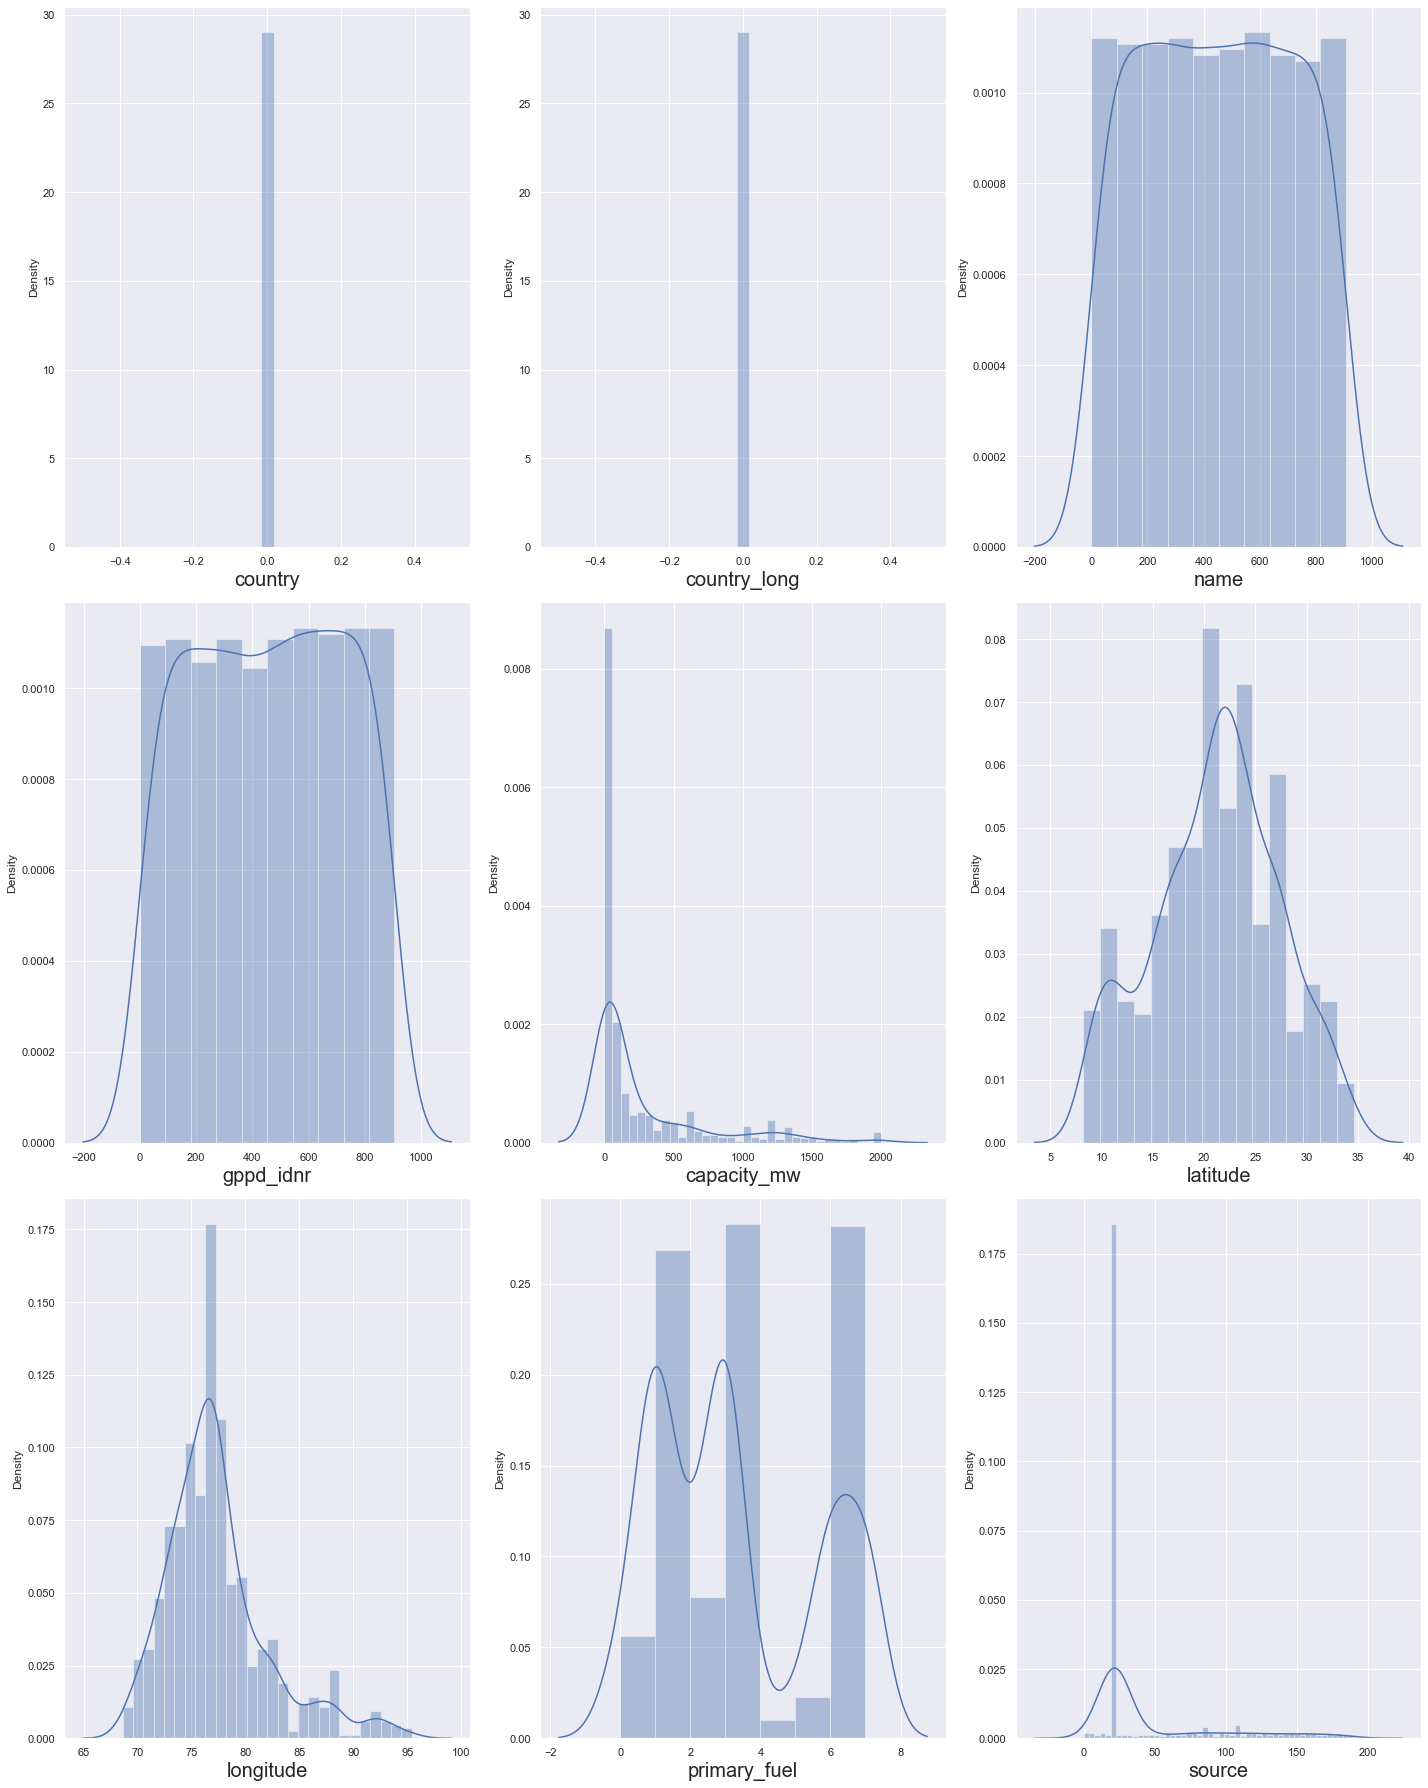

In [35]:
plt.figure(figsize=(20,25), facecolor="white")
plotnumber = 1

for column in df:
    if plotnumber <=9:
        ax = plt.subplot(3,3, plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column, fontsize=20)
    plotnumber+=1
plt.tight_layout()

### Correlation 

In [39]:
corr_matrix = df.corr()
corr_matrix[["primary_fuel","capacity_mw"]]

,primary_fuel,capacity_mw
country,NaN,NaN
country_long,NaN,NaN
name,0.046272,0.039055
gppd_idnr,0.606421,-0.389027
capacity_mw,-0.398990,1.000000
latitude,-0.006418,0.043725
longitude,-0.347989,0.214030
primary_fuel,1.000000,-0.398990
source,0.043505,-0.269735
url,0.586561,-0.268159


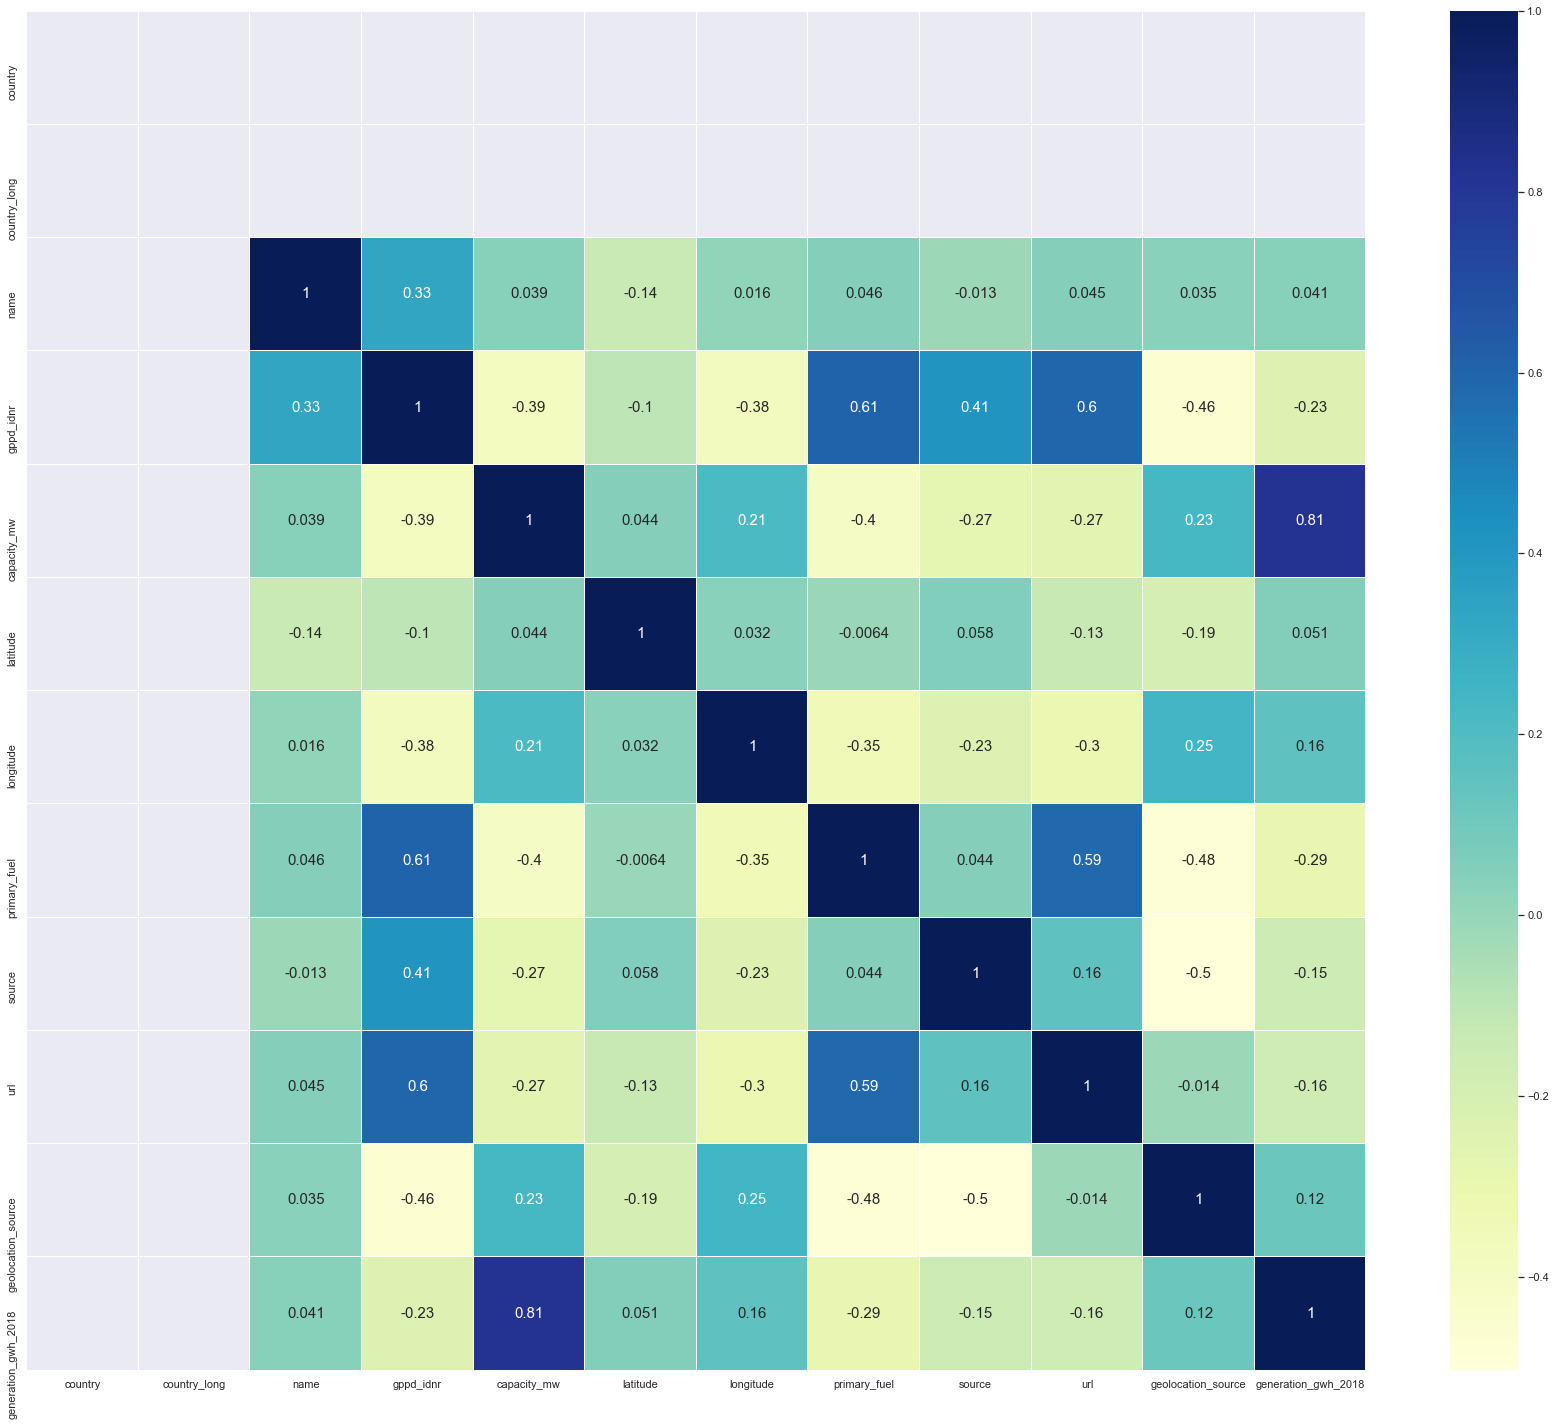

In [42]:
plt.figure(figsize=(30,25))
sns.heatmap(df.corr(),linewidths=0.1,annot=True,fmt='.2g',annot_kws={'size':15},cmap="YlGnBu")
plt.show()

###  Spliting 

In [43]:
x = df.drop(columns = ["capacity_mw", "primary_fuel"], axis=1)

y = df[["capacity_mw", "primary_fuel"]]

### Skewness Handling


In [44]:
x.skew()

country                0.000000
country_long           0.000000
name                   0.006738
gppd_idnr             -0.023264
latitude              -0.137594
longitude              1.215696
source                 1.791620
url                    1.475755
geolocation_source    -2.122134
generation_gwh_2018    2.901686
dtype: float64

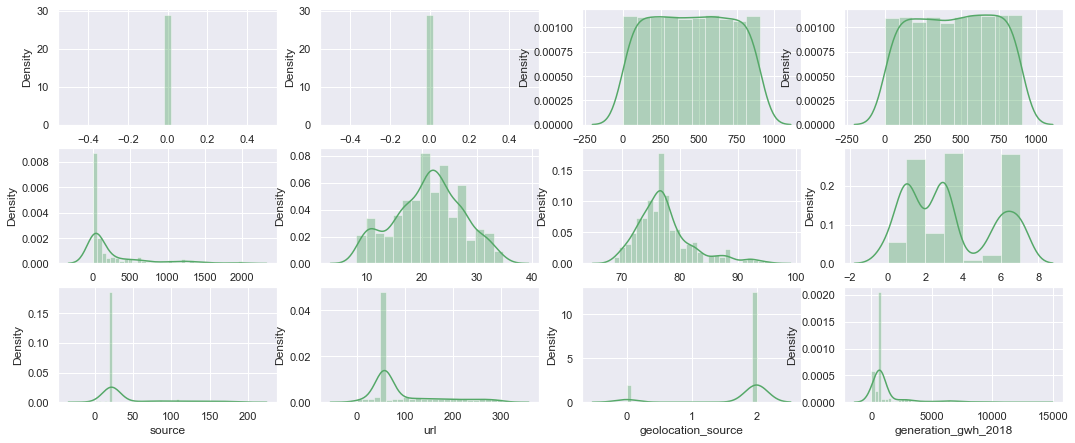

In [45]:
plt.figure(figsize=(18,20))
for i in enumerate(df):
    plt.subplot(8,4,i[0]+1)
    sns.distplot(df[i[1]],color='g')

In [46]:
# Using StandardScaler:

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [47]:
# Find VIF:

vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(x_scaled, i) for i in range(x_scaled.shape[1])]
vif["Features"] = x.columns
vif

,vif,Features
0,NaN,country
1,NaN,country_long
2,1.358053,name
3,3.290109,gppd_idnr
4,1.092682,latitude
5,1.224598,longitude
6,1.439347,source
7,2.014162,url
8,1.945352,geolocation_source
9,1.083630,generation_gwh_2018


In [48]:
#Feature Scaling using Standard Scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x

,country,country_long,name,gppd_idnr,latitude,longitude,source,url,geolocation_source,generation_gwh_2018
0,0.0,0.0,-1.724910,0.762289,1.142940,-0.859855,1.436997,0.461227,-1.064414,-0.308395
1,0.0,0.0,-1.721092,0.236887,0.585739,-0.574460,2.881560,1.095789,0.399362,-0.308395
2,0.0,0.0,-1.717274,1.508513,0.119042,-1.666525,-0.518720,1.547032,0.399362,-0.308395
3,0.0,0.0,-1.713456,-1.739082,0.439804,2.919448,-0.496496,-0.525868,0.399362,-0.377237
4,0.0,0.0,-1.709638,-1.735275,0.128253,1.052458,-0.496496,-0.525868,0.399362,3.274877
...,...,...,...,...,...,...,...,...,...,...
882,0.0,0.0,1.719005,0.130284,-0.795425,-0.001333,-0.496496,-0.525868,0.399362,-0.344156
883,0.0,0.0,1.722823,1.390488,-1.350033,0.167322,0.725827,-1.033517,-2.528190,-0.308395
884,0.0,0.0,1.726641,1.653189,-0.961577,-0.371702,-0.518720,2.322607,0.399362,-0.308395
885,0.0,0.0,1.730459,0.313032,0.517866,-0.754107,0.325794,-0.187435,0.399362,-0.308395


### Split dataset in train and test data set

In [49]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.30, random_state = 380)

### Build ML Models


In [51]:
#Finding the best random state
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [53]:
#Importing Regression Models:

from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

### DecisionTreeRegressor

In [54]:
dt_reg = DecisionTreeRegressor()
dt_reg.fit(x_train,y_train)

y_pred = dt_reg.predict(x_test)

print("Adjusted R2 squared : ",dt_reg.score(x_train,y_train))
print("Mean Absolute Error (MAE): ", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error (MSE): ",mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error (RMSE): ",np.sqrt(mean_squared_error(y_test, y_pred)))

Adjusted R2 squared :  1.0
Mean Absolute Error (MAE):  72.23576966292134
Mean Squared Error (MSE):  40662.332571316496
Root Mean Squared Error (RMSE):  201.64903315244658


### ExtraTreesRegressor

In [55]:
from sklearn.ensemble import ExtraTreesRegressor

extra_reg = ExtraTreesRegressor()

extra_reg.fit(x_train,y_train)

y_pred = extra_reg.predict(x_test)

print("Adjusted R2 squared : ",extra_reg.score(x_train,y_train))
print("Mean Absolute Error (MAE): ", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error (MSE): ",mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error (RMSE): ",np.sqrt(mean_squared_error(y_test, y_pred)))

Adjusted R2 squared :  1.0
Mean Absolute Error (MAE):  55.54241097378281
Mean Squared Error (MSE):  19440.528705931527
Root Mean Squared Error (RMSE):  139.42929644063878


### RandomForestRegressor

In [56]:
rf_reg = RandomForestRegressor()
rf_reg.fit(x_train,y_train)

y_pred = rf_reg.predict(x_test)

print("Adjusted R2 squared : ",rf_reg.score(x_train,y_train))
print("Mean Absolute Error (MAE): ", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error (MSE): ",mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error (RMSE): ",np.sqrt(mean_squared_error(y_test, y_pred)))

Adjusted R2 squared :  0.9719360723696735
Mean Absolute Error (MAE):  53.80068194756555
Mean Squared Error (MSE):  19491.55321848275
Root Mean Squared Error (RMSE):  139.61215283234748


### ExtraTreeRegressor

In [57]:
from sklearn.tree import ExtraTreeRegressor

ext_tree_reg = ExtraTreeRegressor()
ext_tree_reg.fit(x_train,y_train)

y_pred = ext_tree_reg.predict(x_test)

print("Adjusted R2 squared : ",ext_tree_reg.score(x_train,y_train))
print("Mean Absolute Error (MAE): ", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error (MSE): ",mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error (RMSE): ",np.sqrt(mean_squared_error(y_test, y_pred)))

Adjusted R2 squared :  1.0
Mean Absolute Error (MAE):  72.47766853932585
Mean Squared Error (MSE):  40947.28151121537
Root Mean Squared Error (RMSE):  202.35434641048698


### KNN

In [58]:
from sklearn.neighbors import KNeighborsRegressor

k_neigh_reg = KNeighborsRegressor()
k_neigh_reg.fit(x_train,y_train)

y_pred = k_neigh_reg.predict(x_test)

print("Adjusted R2 squared : ",k_neigh_reg.score(x_train,y_train))
print("Mean Absolute Error (MAE): ", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error (MSE): ",mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error (RMSE): ",np.sqrt(mean_squared_error(y_test, y_pred)))

Adjusted R2 squared :  0.851846853472581
Mean Absolute Error (MAE):  56.37681011235953
Mean Squared Error (MSE):  21585.70220593401
Root Mean Squared Error (RMSE):  146.92073443164517


#### Cross validation

In [59]:
from sklearn.model_selection import cross_val_score

scr = cross_val_score(dt_reg, x, y, cv=5)
print("Cross Validation score of DecisionTreeRegressor model is:", scr.mean())

scr = cross_val_score(extra_reg, x, y, cv=5)
print("Cross Validation score of ExtraTreesRegressor model is:", scr.mean())

scr = cross_val_score(rf_reg, x, y, cv=5)
print("Cross Validation score of RandomForestRegressor model is:", scr.mean())

scr = cross_val_score(ext_tree_reg, x, y, cv=5)
print("Cross Validation score of ExtraTreeRegressor model is:", scr.mean())

scr = cross_val_score(k_neigh_reg, x, y, cv=5)
print("Cross Validation score of KNeighborsRegressor model is:", scr.mean())

Cross Validation score of DecisionTreeRegressor model is: 0.5290217951399968
Cross Validation score of ExtraTreesRegressor model is: 0.8149719452900783
Cross Validation score of RandomForestRegressor model is: 0.7862582328531327
Cross Validation score of ExtraTreeRegressor model is: 0.5515480586645088
Cross Validation score of KNeighborsRegressor model is: 0.7715070018508632


### Hyper Parameter Tuning


In [61]:
parameters = {"n_estimators":[10, 20, 30, 40, 50],
              "criterion":["mse", "mae"],
              "max_features":["auto", "sqrt", "log2"],
              "random_state":[10, 20, 30, 40, 50],
              "min_samples_split":[1, 2 ,3]
             }

In [62]:
from sklearn.model_selection import GridSearchCV

GCV = GridSearchCV(RandomForestRegressor(), parameters, cv=5)

In [63]:
GCV.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'criterion': ['mse', 'mae'],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_split': [1, 2, 3],
                         'n_estimators': [10, 20, 30, 40, 50],
                         'random_state': [10, 20, 30, 40, 50]})

In [64]:
GCV.best_params_

{'criterion': 'mae',
 'max_features': 'sqrt',
 'min_samples_split': 2,
 'n_estimators': 50,
 'random_state': 20}

###  Rebuild  the Model

In [65]:
rand_mod_final = RandomForestRegressor(criterion ="mae", max_features ="auto", min_samples_split =3, n_estimators =40, random_state= 10)

rand_mod_final.fit(x_train,y_train)
pred = rand_mod_final.predict(x_test)

## Save the Model

In [66]:
import joblib
 
joblib.dump(rand_mod_final,"Global_PowerPlant.pkl")

['Global_PowerPlant.pkl']

In [67]:
# load Data:

model = joblib.load("Global_PowerPlant.pkl")

prediction = model.predict(x_test)

prediction=pd.DataFrame(prediction)
prediction[[1]] =  round(prediction[[1]])
prediction

,0,1
0,1384.375000,1.0
1,4.781250,6.0
2,51.423250,1.0
3,92.195000,3.0
4,59.946875,7.0
...,...,...
262,772.845000,1.0
263,1070.593750,1.0
264,143.663750,3.0
265,31.252500,1.0
